In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']


URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [12]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [13]:
y.head()

0    101.159902
1     78.442913
2   -159.238195
3    120.719533
4      2.920673
Name: 0, dtype: float64

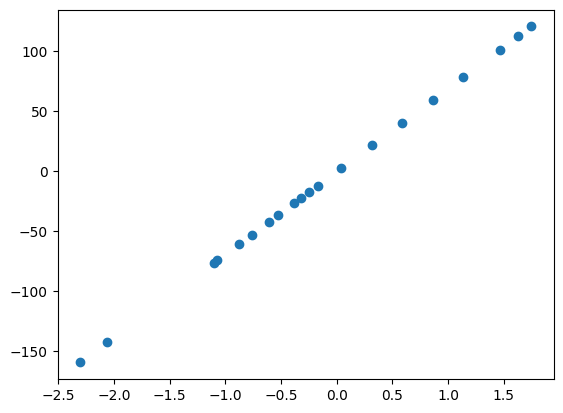

In [14]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [15]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def fit(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
        

In [16]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153397


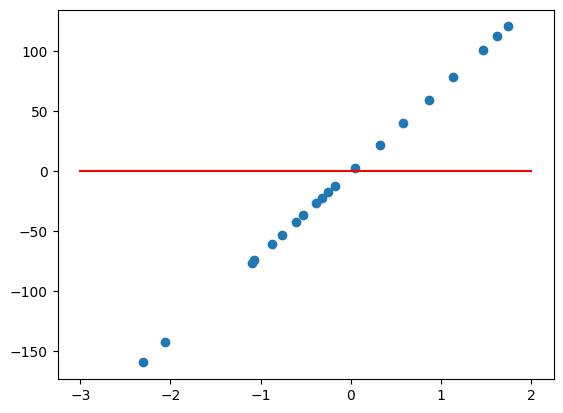

In [17]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [18]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.745680891855


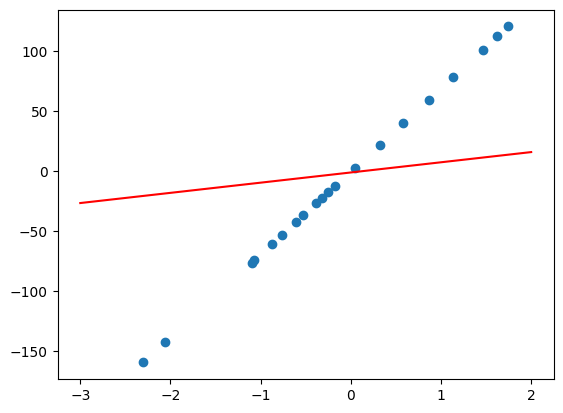

In [19]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [20]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [21]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.03937321303112905


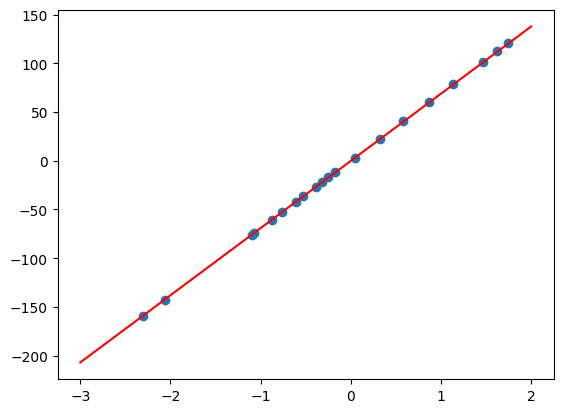

In [22]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

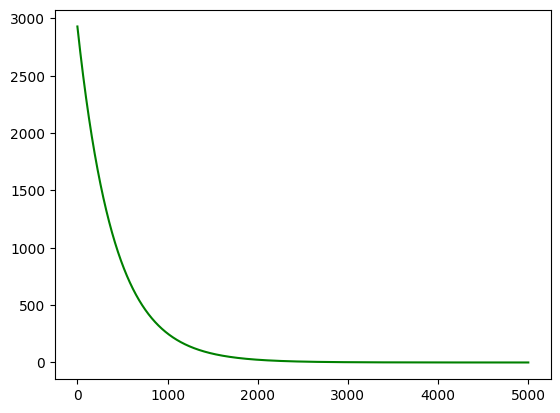

In [23]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()


In [24]:
steps, errors = hyp.fit(x, y, alpha=1.56, max_steps=1000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 11493087.663044268


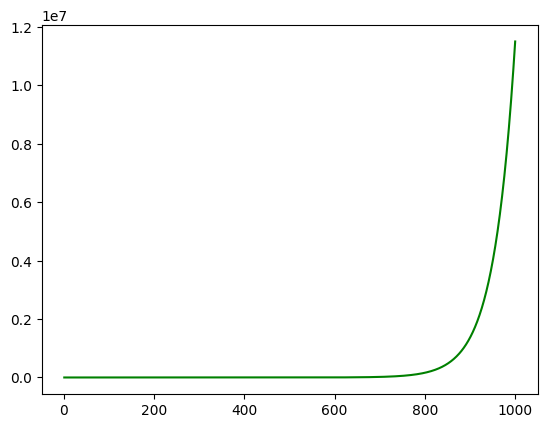

In [25]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [ ]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.last_fit_steps = []
        self.last_fit_errors = []

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return np.sum((self.predict(X) - Y) ** 2) / (2 * len(X))
    
    def show_last_fit_graph(self):
        plt.figure()
        plt.plot(self.last_fit_steps, self.last_fit_errors, 'g')
        plt.show()

    def show_model(self):
        X0 = np.linspace(-3, 1, 100)
        Y0 = self.predict(X0)
        plt.figure()
        plt.scatter(X0, Y0)
        plt.plot(X0, Y0, 'r')
        plt.show()

    def fit(self, X, Y, alpha=1, accuracy=0.01, max_steps=5000):
        self.last_fit_errors, self.last_fit_steps = [], []
        step = 0
        while step < max_steps:
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            self.last_fit_steps.append(step)
            self.last_fit_errors.append(new_err)
            if new_err < accuracy:
                print('Accuracy reached. New error:', new_err)
                break

            if step > 1 and self.last_fit_errors[-1] > self.last_fit_errors[-2]:
                alpha /= 2
                step = 0
                print('Error increased. New alpha:', alpha)
        else: 
            print('Max steps reached', 'New error:', new_err)
        return self.last_fit_steps, self.last_fit_errors

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']


In [167]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.last_fit_steps = []
        self.last_fit_errors = []
        self.x_min = None
        self.x_max = None

    def _prepare(self, arr):
        return np.asarray(arr).squeeze()

    def normalize(self, X):
        X = self._prepare(X)
        return (X - self.x_min) / (self.x_max - self.x_min)

    def predict(self, X):
        X = self._prepare(X)
        if self.x_min is not None and self.x_max is not None:
            X = self.normalize(X)
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X = self._prepare(X)
        Y = self._prepare(Y)
        if self.x_min is not None and self.x_max is not None:
            X = self.normalize(X)
        return np.sum((self.predict(X) - Y) ** 2) / (2 * len(X))
    
    def show_last_fit_graph(self):
        plt.figure()
        plt.plot(self.last_fit_steps, self.last_fit_errors, 'g')
        plt.xlabel('Step')
        plt.ylabel('Error')
        plt.title('Gradient Descent Error')
        plt.show()

    def show_model(self, X, Y):
        X = self._prepare(X)
        Y = self._prepare(Y)
        X0 = np.linspace(np.min(X), np.max(X), 100)
        Y0 = self.predict(X0)
        plt.figure()
        plt.scatter(X, Y, label='Data')
        plt.plot(X0, Y0, 'r', label='Model')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Linear Regression Fit')
        plt.legend()
        plt.show()

    def fit(self, X, Y, alpha=1, accuracy=0.01, max_steps=5000):
        X = self._prepare(X)
        Y = self._prepare(Y)
        self.x_min = np.min(X)
        self.x_max = np.max(X)
        X_norm = self.normalize(X)
        self.last_fit_errors, self.last_fit_steps = [], []
        step = 0
        while step < max_steps:
            dJ0 = np.sum(self.b0 + self.b1 * X_norm - Y) / len(X_norm)
            dJ1 = np.sum((self.b0 + self.b1 * X_norm - Y) * X_norm) / len(X_norm)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = np.sum((self.b0 + self.b1 * X_norm - Y) ** 2) / (2 * len(X_norm))
            step += 1
            self.last_fit_steps.append(step)
            self.last_fit_errors.append(new_err)
            if new_err < accuracy:
                print('Accuracy reached. New error:', new_err)
                break
            if step > 1 and self.last_fit_errors[-1] > self.last_fit_errors[-2]:
                alpha /= 2
                print('Error increased. New alpha:', alpha)
        else: 
            print('Max steps reached', 'New error:', new_err)
        return self.last_fit_steps, self.last_fit_errors

Error increased. New alpha: 0.78
Max steps reached New error: 0.002800056292707447


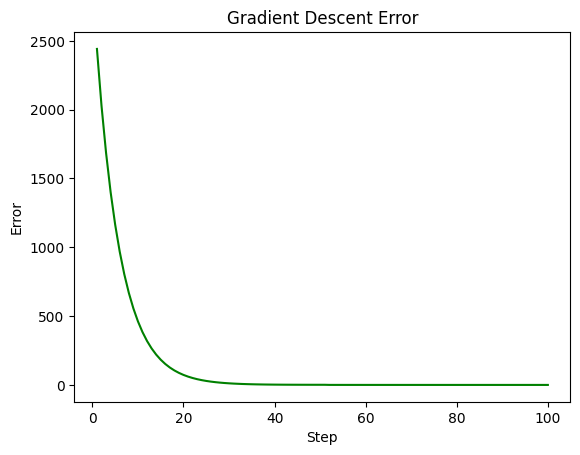

In [168]:
model3 = Model()
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']
model3.fit(x, y, alpha=1.56, accuracy=0.000000001, max_steps=100)
model3.show_last_fit_graph()

In [170]:
model2 = Model()
steps, errors = model2.fit(x, y, alpha=0.1, accuracy=0.01, max_steps=1000)

Max steps reached New error: 0.034236707106327466
